In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("./DATASET/homeprice.csv")
data

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [6]:
dummies = pd.get_dummies(data['town'])

In [7]:
merged = pd.concat([data,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [14]:
df = merged.drop(columns=['town','west windsor'])

In [15]:
df

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [18]:
x = df.drop(columns=['price'])
y = df['price']

In [19]:
lr.fit(x,y)

LinearRegression()

In [21]:
lr.score(x,y)

0.9573929037221872

In [22]:
data

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df = data
df['town'] = le.fit_transform(data['town'])

In [26]:
df

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [69]:
x = df[['town','area']].values
x.reshape(-1,1)

array([[   0],
       [2600],
       [   0],
       [3000],
       [   0],
       [3200],
       [   0],
       [3600],
       [   0],
       [4000],
       [   2],
       [2600],
       [   2],
       [2800],
       [   2],
       [3300],
       [   2],
       [3600],
       [   1],
       [2600],
       [   1],
       [2900],
       [   1],
       [3100],
       [   1],
       [3600]], dtype=int64)

In [70]:
y = df['price']
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [75]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()

In [76]:
one.fit(x)

OneHotEncoder()

In [79]:
x = one.fit_transform(x).toarray()

In [ ]:
# Car Model,Mileage,Sell Price($),Age(yrs)
# BMW X5,69000,18000,6
# BMW X5,35000,34000,3
# BMW X5,57000,26100,5
# BMW X5,22500,40000,2
# BMW X5,46000,31500,4
# Audi A5,59000,29400,5
# Audi A5,52000,32000,5
# Audi A5,72000,19300,6
# Audi A5,91000,12000,8
# Mercedez Benz C class,67000,22000,6
# Mercedez Benz C class,83000,20000,7
# Mercedez Benz C class,79000,21000,7
# Mercedez Benz C class,59000,33000,5

In [81]:
data = pd.read_csv("./DATASET/temp.csv")
data

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [82]:
pd.get_dummies(data['Car Model'])

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = data
df['Car Model']=le.fit_transform(data['Car Model'])
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [89]:
x = data.drop(columns=['Sell Price($)'])
y = data['Sell Price($)']

In [90]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [92]:
lr.score(x,y)

0.8719970367825953

In [ ]:
lr.predict([[2,45000,4]])

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33336.7721827])

In [93]:
lr.predict([[1,86000,7]])


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16106.74127344])

In [ ]:
# Mileage,Age(yrs),Sell Price($)
# 69000,6,18000
# 35000,3,34000
# 57000,5,26100
# 22500,2,40000
# 46000,4,31500
# 59000,5,26750
# 52000,5,32000
# 72000,6,19300
# 91000,8,12000
# 67000,6,22000
# 83000,7,18700
# 79000,7,19500
# 59000,5,26000
# 58780,4,27500
# 82450,7,19400
# 25400,3,35000
# 28000,2,35500
# 69000,5,19700
# 87600,8,12800
# 52000,5,28200

In [96]:
data = pd.read_csv("./DATASET/temp.csv")
data.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


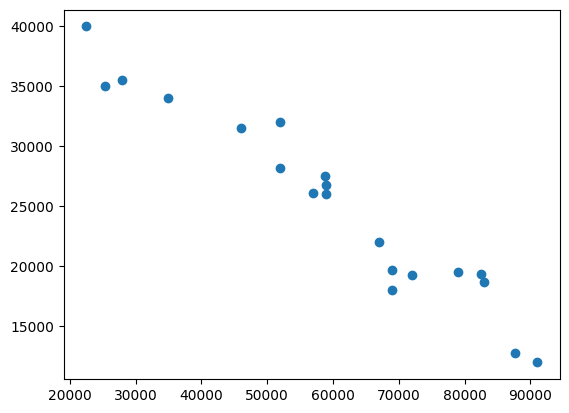

In [97]:
plt.scatter(data['Mileage'],data['Sell Price($)'])

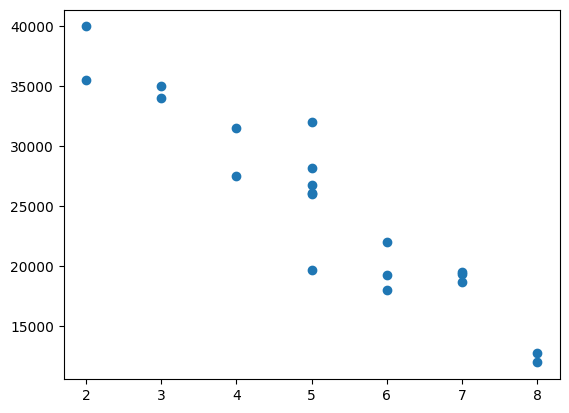

In [99]:
plt.scatter(data['Age(yrs)'],data['Sell Price($)'])

In [102]:
data.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [101]:
x = data.iloc[:,:-1]
y = data['Sell Price($)']

In [103]:
from sklearn.model_selection import train_test_split

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [107]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [115]:
lr.fit(x_train,y_train)

LinearRegression()

In [116]:
lr.score(x_test,y_test),lr.score(x_train,y_train)

(0.9289541166748493, 0.9310216759405431)

In [ ]:
# age,bought_insurance
# 22,0
# 25,0
# 47,1
# 52,0
# 46,1
# 56,1
# 55,0
# 60,1
# 62,1
# 61,1
# 18,0
# 28,0
# 27,0
# 29,0
# 49,1
# 55,1
# 25,1
# 58,1
# 19,0
# 18,0
# 21,0
# 26,0
# 40,1
# 45,1
# 50,1
# 54,1
# 23,0

In [117]:
data = pd.read_csv("./DATASET/temp.csv")
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


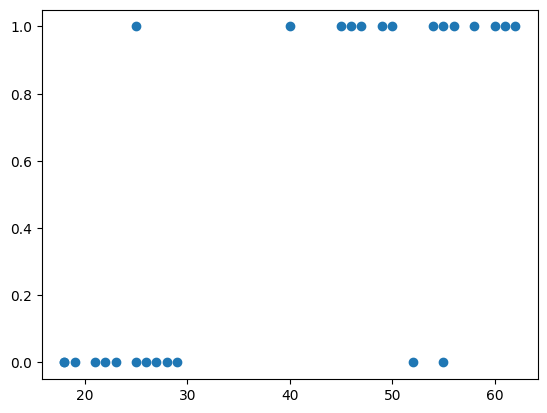

In [118]:
plt.scatter(data['age'],data['bought_insurance'])

In [119]:
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [120]:
from sklearn.linear_model import LinearRegression

In [122]:
lr = LinearRegression()
lr.fit(data[['age']],data['bought_insurance'])

LinearRegression()

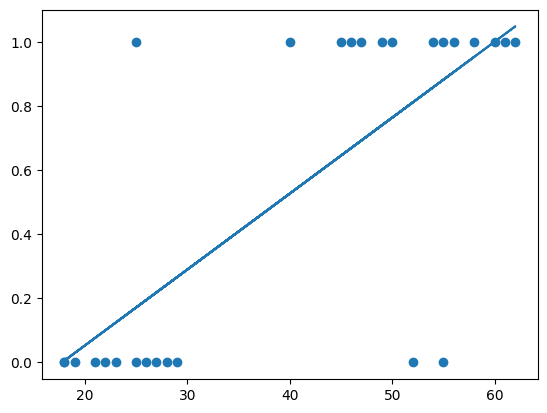

In [123]:
plt.scatter(data['age'],data['bought_insurance'])
plt.plot(data['age'],lr.predict(data[['age']]))

In [124]:
x = data[['age']]
y = data['bought_insurance']

In [160]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [126]:
from sklearn.linear_model import LogisticRegression

In [161]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [162]:
lr.score(x_train,y_train) , lr.score(x_test,y_test)

(0.8571428571428571, 1.0)

In [163]:
lr.predict_proba(x_test)

array([[0.07149837, 0.92850163],
       [0.10786034, 0.89213966],
       [0.88695424, 0.11304576],
       [0.78083769, 0.21916231],
       [0.73981335, 0.26018665],
       [0.79952571, 0.20047429]])

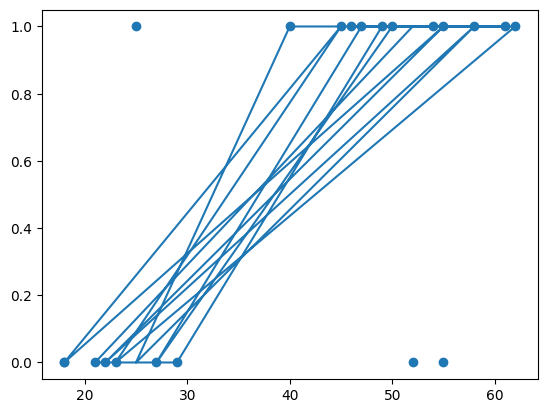

In [164]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train))

In [193]:
data = pd.read_csv("./DATASET/temp.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [194]:
left = data[data['left']==1]
retention = data[data['left']==0]

In [195]:
data.groupby("left").mean()

C:\Users\Asus\AppData\Local\Temp\ipykernel_33616\2507836626.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("left").mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [196]:
pd.crosstab(data['salary'],data.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<Axes: xlabel='salary'>

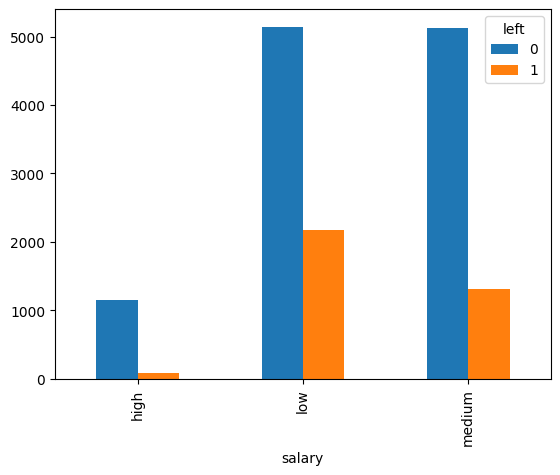

In [197]:
pd.crosstab(data['salary'],data.left).plot(kind='bar')

In [187]:
data['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

<Axes: xlabel='Department'>

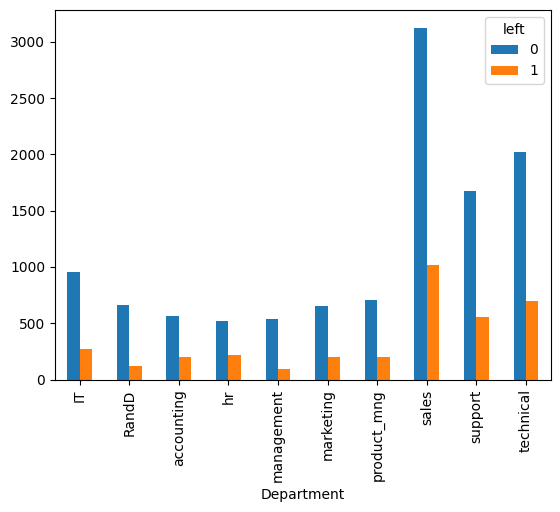

In [186]:
pd.crosstab(data['Department'],data['left']).plot(kind='bar')

In [189]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [198]:
subf = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [199]:
subf['salary']=le.fit_transform(data['salary'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_33616\486787663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subf['salary']=le.fit_transform(data['salary'])


In [210]:
subf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1


In [201]:
x = subf
y = data.left

In [220]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [221]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [209]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [224]:
lr.predict([[0.80,262,0,2]])

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [225]:
lr.score(x_train,y_train),lr.score(x_test,y_test)

(0.7745645470455871, 0.7656666666666667)

In [226]:
from sklearn.datasets import load_digits

In [227]:
digits = load_digits()

In [228]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

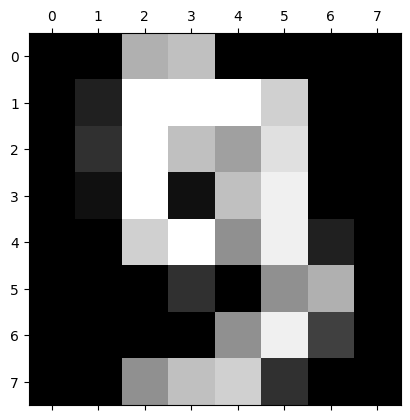

In [231]:
plt.gray()
plt.matshow(digits.images[9])

In [233]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)


In [235]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [236]:
lr.score(x_train,y_train),lr.score(x_test,y_test)

(1.0, 0.9722222222222222)

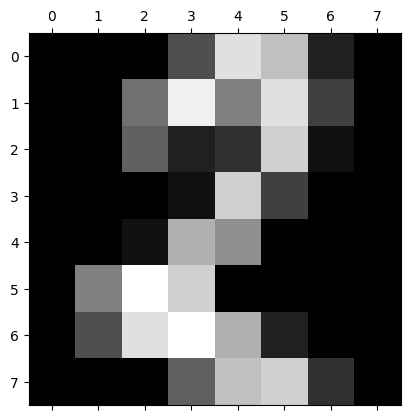

In [242]:
plt.matshow(digits.images[50])

In [241]:
lr.predict([digits.data[50]])

array([2])

In [243]:
from sklearn.metrics import confusion_matrix

In [244]:
y_pred = lr.predict(x_test)

In [246]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 43,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 33,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 33]], dtype=int64)

<Axes: >

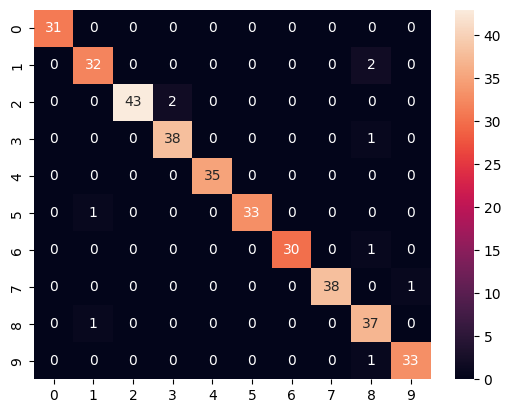

In [248]:
sns.heatmap(cm,annot=True)

In [249]:
from  sklearn.datasets import load_iris
iris = load_iris()

In [250]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [251]:
x = iris.data
y = iris.target


In [252]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [253]:
lr.fit(x_train,y_train)

LogisticRegression()

In [254]:
lr.score(x_test,y_test),lr.score(x_train,y_train)

(0.9666666666666667, 0.975)

<Axes: >

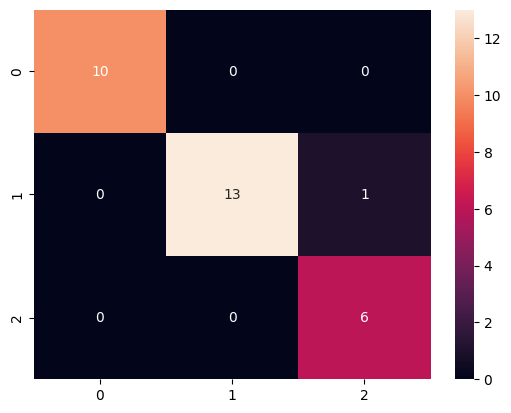

In [255]:
cm = confusion_matrix(y_test,lr.predict(x_test))
sns.heatmap(cm,annot=True)

In [260]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [263]:
#   Entropy is a measure of uncertainty or impurity in a dataset

In [262]:
data = pd.read_csv("./DATASET/t1.csv")
data.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [264]:
x = data.iloc[:,:-1]
y = data['salary_more_then_100k']

In [265]:
from sklearn.preprocessing import LabelEncoder

In [267]:
le_com = LabelEncoder()
le_job = LabelEncoder()
le_deg = LabelEncoder()

In [268]:
x['company_n'] = le_com.fit_transform(x['company'])
x['hob_n'] = le_job.fit_transform(x['job'])
x['degree_n'] = le_deg.fit_transform(x['degree'])

In [269]:
x.head()

,company,job,degree,company_n,hob_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [275]:
xx = x.iloc[:,3:]
xx

,company_n,hob_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [279]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [272]:
from sklearn import tree

In [273]:
model = tree.DecisionTreeClassifier()
model.fit(xx,y)


DecisionTreeClassifier()

In [ ]:
model.score(xx,y)

1.0

In [278]:
model.predict([[1,1,1]])

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [281]:
data = pd.read_csv("./DATASET/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [282]:
data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [285]:
x = data[["Pclass","Sex","Age","Fare"]]
y = data['Survived']

In [289]:
x['Sex'] = x['Sex'].map({"male":1,"female":2})

C:\Users\Asus\AppData\Local\Temp\ipykernel_33616\1753109412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex'] = x['Sex'].map({"male":1,"female":2})


In [291]:
x['Age'].fillna(x['Age'].mean(),inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_33616\3679931963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Age'].fillna(x['Age'].mean(),inplace=True)


In [325]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=49)

In [326]:
from sklearn import tree
dc = tree.DecisionTreeClassifier()
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [327]:
dc.score(x_train,y_train),dc.score(x_test,y_test)

(0.9803370786516854, 0.8379888268156425)